<a href="https://colab.research.google.com/github/robiulislam1999/CSE718/blob/main/chap07_file02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Examples**

Limits to Growth

In [1]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')
# import functions from modsim
from modsim import *

Downloaded modsim.py


In [2]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [3]:
from pandas import read_html
filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']

In [4]:
un = table2.un / 1e9
census = table2.census / 1e9

In [5]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap06.py')

Downloaded chap06.py


In [6]:
from chap06 import run_simulation

def plot_estimates():
    census.plot(style='.', label='Stadela')
    un.plot(style='-', label='Copur')
    decorate(xlabel='Year',
             ylabel='World population (billions)')

Quadratic Growth

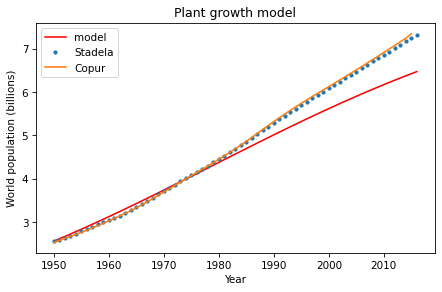

In [7]:
def growth_func(t, pop, system):
    return system.alpha * pop + system.beta * pop**2
t_0 = census.index[0]
p_0 = census[t_0]
t_end = census.index[-1]
system = System(t_0=t_0,
                p_0=p_0,
                t_end=t_end)
system.alpha = 30 / 1000
system.beta = -3.5 / 1000
result = run_simulation(system, growth_func)
result.plot(color='red', label='model')
plot_estimates()
decorate(title='Plant growth model')

Net Growth

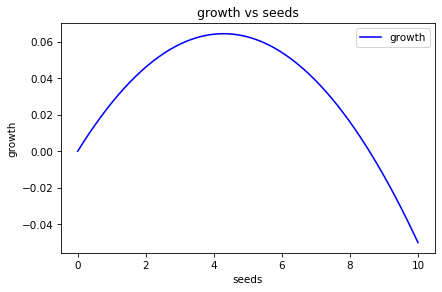

In [8]:
from numpy import linspace
pop_array = linspace(0, 10, 60)
growth_array = (system.alpha * pop_array +
                system.beta * pop_array**2)
from matplotlib.pyplot import plot
plot(pop_array, growth_array, label='growth', color='blue')
decorate(xlabel='seeds',
         ylabel='growth',
         title='growth vs seeds')

Finding Equilibrium

In [9]:
-system.alpha / system.beta

8.571428571428571

Dysfunctions

In [10]:
def carry_cap(system):
    K = -system.alpha / system.beta
    return K

sys = System(alpha=0.025, beta=-0.0018)
pop = carry_cap(sys)
print(pop)

13.88888888888889


**Exercises**

Exercise 1

<ipython-input-11-cff3206eb009>:4: RuntimeWarning: overflow encountered in double_scalars
  return system.r * pop *(1-pop/system.k)


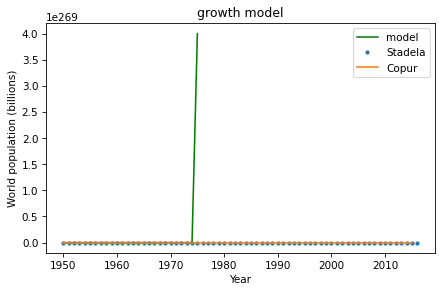

In [11]:
system.r = system.beta
system.k = -system.beta/system.alpha
def growth_func(t, pop, system):
    return system.r * pop *(1-pop/system.k)
results = run_simulation(system, growth_func)
results.plot(color='green', label='model')
plot_estimates()
decorate(title='growth model')

Exercise 2

<ipython-input-11-cff3206eb009>:4: RuntimeWarning: overflow encountered in double_scalars
  return system.r * pop *(1-pop/system.k)
<ipython-input-11-cff3206eb009>:4: RuntimeWarning: overflow encountered in double_scalars
  return system.r * pop *(1-pop/system.k)
<ipython-input-11-cff3206eb009>:4: RuntimeWarning: overflow encountered in double_scalars
  return system.r * pop *(1-pop/system.k)
<ipython-input-11-cff3206eb009>:4: RuntimeWarning: overflow encountered in double_scalars
  return system.r * pop *(1-pop/system.k)
<ipython-input-11-cff3206eb009>:4: RuntimeWarning: overflow encountered in double_scalars
  return system.r * pop *(1-pop/system.k)
<ipython-input-11-cff3206eb009>:4: RuntimeWarning: overflow encountered in double_scalars
  return system.r * pop *(1-pop/system.k)
<ipython-input-11-cff3206eb009>:4: RuntimeWarning: overflow encountered in double_scalars
  return system.r * pop *(1-pop/system.k)


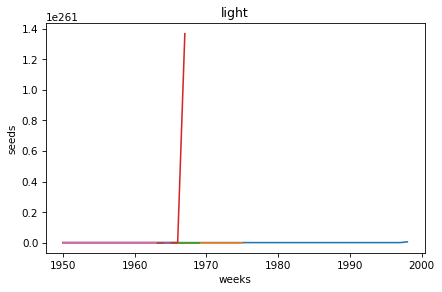

In [12]:
p_array = linspace(1, 10, 7)
for p_0 in p_array:
    system.p_0 = p_0
    resultst = run_simulation(system, growth_func)
    resultst.plot(label='_nolegend')
decorate(xlabel='weeks',
         ylabel='seeds',
         title='light')